In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import constants as ct
import matplotlib.pyplot as plt

# Modelo de previsão de demanda

modelagem de previsão com série temporal

## Dataset

Dados de ocupação com a série temporal

In [2]:
df_occ = pd.read_csv(ct.PATH_OCUPACAO)

Percentagem de leitos disponíveis

In [3]:
df_occ['p_disp'] = df_occ['disponiveis']/df_occ['QT_EXIST']

Unimos as séries temporais em um dataset

In [4]:
unidades = df_occ['Unidade'].unique()

v = []
for u in unidades:
    v.append(df_occ[df_occ['Unidade']==u]['p_disp'].values)
data = np.array(v).T

In [5]:
data.shape

(504, 118)

In [6]:
X = data[1:]
Y = data[:-1]
print(X.shape)
print(Y.shape)

(503, 118)
(503, 118)


## Modelagem

In [7]:
from tensorflow.keras import layers

Modelo sequencial

In [8]:
model = tf.keras.Sequential()
model.add(layers.LSTM(256, input_shape=(None,X.shape[1]),return_sequences=True))
model.add(layers.Dense(X.shape[1]))

Constrói o modelo

In [9]:
model.build(input_shape=(None,None,X.shape[1]))

Mostra do modelo

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 256)         384000    
_________________________________________________________________
dense (Dense)                (None, None, 118)         30326     
Total params: 414,326
Trainable params: 414,326
Non-trainable params: 0
_________________________________________________________________


In [11]:
metrics = [tf.keras.metrics.MSE]

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.MSE,
    metrics=metrics
)

In [13]:
Xin = np.expand_dims(X,0)
Yin = np.expand_dims(Y,0)

In [14]:
model.fit(
    Xin,Yin,epochs=1000)

Train on 1 samples
Epoch 1/1000
1/1 [==============================] - 3s 3s/sample - loss: 1.0816 - mean_squared_error: 1.0816
Epoch 2/1000
1/1 [==============================] - 0s 396ms/sample - loss: 0.6860 - mean_squared_error: 0.6860
Epoch 3/1000
1/1 [==============================] - 0s 443ms/sample - loss: 0.4493 - mean_squared_error: 0.4493
Epoch 4/1000
1/1 [==============================] - 0s 398ms/sample - loss: 0.3013 - mean_squared_error: 0.3013
Epoch 5/1000
1/1 [==============================] - 0s 386ms/sample - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 6/1000
1/1 [==============================] - 0s 396ms/sample - loss: 0.1318 - mean_squared_error: 0.1318
Epoch 7/1000
1/1 [==============================] - 0s 473ms/sample - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 8/1000
1/1 [==============================] - 0s 472ms/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 9/1000
1/1 [==============================] - 1s 508ms/sample - loss: 0.0628 - mea

Epoch 74/1000
1/1 [==============================] - 0s 428ms/sample - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 75/1000
1/1 [==============================] - 0s 407ms/sample - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 76/1000
1/1 [==============================] - 0s 378ms/sample - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 77/1000
1/1 [==============================] - 0s 368ms/sample - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 78/1000
1/1 [==============================] - 0s 346ms/sample - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 79/1000
1/1 [==============================] - 0s 439ms/sample - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 80/1000
1/1 [==============================] - 0s 369ms/sample - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 81/1000
1/1 [==============================] - 0s 386ms/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 82/1000
1/1 [==============================] - 0s 414ms/sample - loss: 0.0072 - mean_squar

1/1 [==============================] - 0s 363ms/sample - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 147/1000
1/1 [==============================] - 0s 382ms/sample - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 148/1000
1/1 [==============================] - 0s 430ms/sample - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 149/1000
1/1 [==============================] - 0s 403ms/sample - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 150/1000
1/1 [==============================] - 0s 435ms/sample - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 151/1000
1/1 [==============================] - 0s 406ms/sample - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 152/1000
1/1 [==============================] - 0s 376ms/sample - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 153/1000
1/1 [==============================] - 0s 360ms/sample - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 154/1000
1/1 [==============================] - 0s 459ms/sample - loss: 0.0023 - mean_squared_err

Epoch 218/1000
1/1 [==============================] - 0s 387ms/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 219/1000
1/1 [==============================] - 0s 404ms/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 220/1000
1/1 [==============================] - 0s 424ms/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 221/1000
1/1 [==============================] - 0s 370ms/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 222/1000
1/1 [==============================] - 0s 382ms/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 223/1000
1/1 [==============================] - 0s 408ms/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 224/1000
1/1 [==============================] - 0s 416ms/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 225/1000
1/1 [==============================] - 0s 378ms/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 226/1000
1/1 [==============================] - 0s 377ms/sample - loss: 0.0017 - m

Epoch 290/1000
1/1 [==============================] - 0s 390ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 291/1000
1/1 [==============================] - 0s 379ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 292/1000
1/1 [==============================] - 0s 400ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 293/1000
1/1 [==============================] - 0s 375ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 294/1000
1/1 [==============================] - 0s 428ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 295/1000
1/1 [==============================] - 0s 439ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 296/1000
1/1 [==============================] - 0s 385ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 297/1000
1/1 [==============================] - 1s 532ms/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 298/1000
1/1 [==============================] - 0s 421ms/sample - loss: 0.0013 - m

Epoch 362/1000
1/1 [==============================] - 0s 400ms/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 363/1000
1/1 [==============================] - 0s 470ms/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 364/1000
1/1 [==============================] - 0s 428ms/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 365/1000
1/1 [==============================] - 0s 375ms/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 366/1000
1/1 [==============================] - 0s 380ms/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 367/1000
1/1 [==============================] - 0s 353ms/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 368/1000
1/1 [==============================] - 0s 394ms/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 369/1000
1/1 [==============================] - 0s 373ms/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 370/1000
1/1 [==============================] - 0s 388ms/sample - loss: 0.0010 - m

Epoch 431/1000
1/1 [==============================] - 0s 346ms/sample - loss: 9.3229e-04 - mean_squared_error: 9.3229e-04
Epoch 432/1000
1/1 [==============================] - 0s 390ms/sample - loss: 9.4876e-04 - mean_squared_error: 9.4876e-04
Epoch 433/1000
1/1 [==============================] - 0s 379ms/sample - loss: 9.1474e-04 - mean_squared_error: 9.1474e-04
Epoch 434/1000
1/1 [==============================] - 0s 365ms/sample - loss: 9.0388e-04 - mean_squared_error: 9.0388e-04
Epoch 435/1000
1/1 [==============================] - 0s 366ms/sample - loss: 9.1524e-04 - mean_squared_error: 9.1524e-04
Epoch 436/1000
1/1 [==============================] - 0s 418ms/sample - loss: 8.9210e-04 - mean_squared_error: 8.9210e-04
Epoch 437/1000
1/1 [==============================] - 0s 364ms/sample - loss: 9.0762e-04 - mean_squared_error: 9.0762e-04
Epoch 438/1000
1/1 [==============================] - 0s 365ms/sample - loss: 8.7562e-04 - mean_squared_error: 8.7562e-04
Epoch 439/1000
1/1 [====

Epoch 499/1000
1/1 [==============================] - 0s 483ms/sample - loss: 7.6088e-04 - mean_squared_error: 7.6088e-04
Epoch 500/1000
1/1 [==============================] - 0s 496ms/sample - loss: 7.5974e-04 - mean_squared_error: 7.5974e-04
Epoch 501/1000
1/1 [==============================] - 0s 395ms/sample - loss: 7.5882e-04 - mean_squared_error: 7.5882e-04
Epoch 502/1000
1/1 [==============================] - 0s 453ms/sample - loss: 7.5806e-04 - mean_squared_error: 7.5806e-04
Epoch 503/1000
1/1 [==============================] - 0s 393ms/sample - loss: 7.5795e-04 - mean_squared_error: 7.5795e-04
Epoch 504/1000
1/1 [==============================] - 0s 425ms/sample - loss: 7.5903e-04 - mean_squared_error: 7.5903e-04
Epoch 505/1000
1/1 [==============================] - 0s 412ms/sample - loss: 7.6316e-04 - mean_squared_error: 7.6316e-04
Epoch 506/1000
1/1 [==============================] - 0s 464ms/sample - loss: 7.7349e-04 - mean_squared_error: 7.7349e-04
Epoch 507/1000
1/1 [====

Epoch 567/1000
1/1 [==============================] - 1s 515ms/sample - loss: 6.9166e-04 - mean_squared_error: 6.9166e-04
Epoch 568/1000
1/1 [==============================] - 1s 510ms/sample - loss: 6.9070e-04 - mean_squared_error: 6.9070e-04
Epoch 569/1000
1/1 [==============================] - 0s 451ms/sample - loss: 6.8987e-04 - mean_squared_error: 6.8987e-04
Epoch 570/1000
1/1 [==============================] - 0s 377ms/sample - loss: 6.8901e-04 - mean_squared_error: 6.8901e-04
Epoch 571/1000
1/1 [==============================] - 0s 383ms/sample - loss: 6.8807e-04 - mean_squared_error: 6.8807e-04
Epoch 572/1000
1/1 [==============================] - 0s 393ms/sample - loss: 6.8707e-04 - mean_squared_error: 6.8707e-04
Epoch 573/1000
1/1 [==============================] - 0s 395ms/sample - loss: 6.8611e-04 - mean_squared_error: 6.8611e-04
Epoch 574/1000
1/1 [==============================] - 0s 485ms/sample - loss: 6.8520e-04 - mean_squared_error: 6.8520e-04
Epoch 575/1000
1/1 [====

Epoch 635/1000
1/1 [==============================] - 0s 464ms/sample - loss: 6.3817e-04 - mean_squared_error: 6.3817e-04
Epoch 636/1000
1/1 [==============================] - 0s 448ms/sample - loss: 6.3747e-04 - mean_squared_error: 6.3747e-04
Epoch 637/1000
1/1 [==============================] - 0s 458ms/sample - loss: 6.3638e-04 - mean_squared_error: 6.3638e-04
Epoch 638/1000
1/1 [==============================] - 0s 372ms/sample - loss: 6.3557e-04 - mean_squared_error: 6.3557e-04
Epoch 639/1000
1/1 [==============================] - 0s 360ms/sample - loss: 6.3511e-04 - mean_squared_error: 6.3511e-04
Epoch 640/1000
1/1 [==============================] - 0s 367ms/sample - loss: 6.3432e-04 - mean_squared_error: 6.3432e-04
Epoch 641/1000
1/1 [==============================] - 0s 367ms/sample - loss: 6.3330e-04 - mean_squared_error: 6.3330e-04
Epoch 642/1000
1/1 [==============================] - 0s 393ms/sample - loss: 6.3227e-04 - mean_squared_error: 6.3227e-04
Epoch 643/1000
1/1 [====

Epoch 703/1000
1/1 [==============================] - 1s 505ms/sample - loss: 5.9819e-04 - mean_squared_error: 5.9819e-04
Epoch 704/1000
1/1 [==============================] - 1s 507ms/sample - loss: 5.9383e-04 - mean_squared_error: 5.9383e-04
Epoch 705/1000
1/1 [==============================] - 1s 534ms/sample - loss: 5.9238e-04 - mean_squared_error: 5.9238e-04
Epoch 706/1000
1/1 [==============================] - 0s 462ms/sample - loss: 5.9508e-04 - mean_squared_error: 5.9508e-04
Epoch 707/1000
1/1 [==============================] - 1s 512ms/sample - loss: 5.9643e-04 - mean_squared_error: 5.9643e-04
Epoch 708/1000
1/1 [==============================] - 1s 607ms/sample - loss: 5.9424e-04 - mean_squared_error: 5.9424e-04
Epoch 709/1000
1/1 [==============================] - 1s 527ms/sample - loss: 5.9346e-04 - mean_squared_error: 5.9346e-04
Epoch 710/1000
1/1 [==============================] - 0s 432ms/sample - loss: 5.9780e-04 - mean_squared_error: 5.9780e-04
Epoch 711/1000
1/1 [====

Epoch 771/1000
1/1 [==============================] - 0s 491ms/sample - loss: 5.5828e-04 - mean_squared_error: 5.5828e-04
Epoch 772/1000
1/1 [==============================] - 0s 407ms/sample - loss: 5.5509e-04 - mean_squared_error: 5.5509e-04
Epoch 773/1000
1/1 [==============================] - 1s 577ms/sample - loss: 5.5571e-04 - mean_squared_error: 5.5571e-04
Epoch 774/1000
1/1 [==============================] - 0s 382ms/sample - loss: 5.5824e-04 - mean_squared_error: 5.5824e-04
Epoch 775/1000
1/1 [==============================] - 0s 425ms/sample - loss: 5.5984e-04 - mean_squared_error: 5.5984e-04
Epoch 776/1000
1/1 [==============================] - 0s 458ms/sample - loss: 5.5837e-04 - mean_squared_error: 5.5837e-04
Epoch 777/1000
1/1 [==============================] - 1s 516ms/sample - loss: 5.5528e-04 - mean_squared_error: 5.5528e-04
Epoch 778/1000
1/1 [==============================] - 0s 466ms/sample - loss: 5.5209e-04 - mean_squared_error: 5.5209e-04
Epoch 779/1000
1/1 [====

Epoch 839/1000
1/1 [==============================] - 0s 431ms/sample - loss: 5.2372e-04 - mean_squared_error: 5.2372e-04
Epoch 840/1000
1/1 [==============================] - 0s 421ms/sample - loss: 5.2257e-04 - mean_squared_error: 5.2257e-04
Epoch 841/1000
1/1 [==============================] - 0s 424ms/sample - loss: 5.2207e-04 - mean_squared_error: 5.2207e-04
Epoch 842/1000
1/1 [==============================] - 0s 463ms/sample - loss: 5.2207e-04 - mean_squared_error: 5.2207e-04
Epoch 843/1000
1/1 [==============================] - 0s 399ms/sample - loss: 5.2172e-04 - mean_squared_error: 5.2172e-04
Epoch 844/1000
1/1 [==============================] - 0s 496ms/sample - loss: 5.2075e-04 - mean_squared_error: 5.2075e-04
Epoch 845/1000
1/1 [==============================] - 0s 465ms/sample - loss: 5.1977e-04 - mean_squared_error: 5.1977e-04
Epoch 846/1000
1/1 [==============================] - 1s 523ms/sample - loss: 5.1940e-04 - mean_squared_error: 5.1940e-04
Epoch 847/1000
1/1 [====

Epoch 907/1000
1/1 [==============================] - 0s 461ms/sample - loss: 4.9558e-04 - mean_squared_error: 4.9558e-04
Epoch 908/1000
1/1 [==============================] - 1s 551ms/sample - loss: 4.9604e-04 - mean_squared_error: 4.9604e-04
Epoch 909/1000
1/1 [==============================] - 0s 476ms/sample - loss: 4.9540e-04 - mean_squared_error: 4.9540e-04
Epoch 910/1000
1/1 [==============================] - 0s 456ms/sample - loss: 4.9387e-04 - mean_squared_error: 4.9387e-04
Epoch 911/1000
1/1 [==============================] - 0s 404ms/sample - loss: 4.9327e-04 - mean_squared_error: 4.9327e-04
Epoch 912/1000
1/1 [==============================] - 0s 451ms/sample - loss: 4.9359e-04 - mean_squared_error: 4.9359e-04
Epoch 913/1000
1/1 [==============================] - 0s 380ms/sample - loss: 4.9326e-04 - mean_squared_error: 4.9326e-04
Epoch 914/1000
1/1 [==============================] - 0s 418ms/sample - loss: 4.9201e-04 - mean_squared_error: 4.9201e-04
Epoch 915/1000
1/1 [====

Epoch 975/1000
1/1 [==============================] - 0s 393ms/sample - loss: 4.7209e-04 - mean_squared_error: 4.7209e-04
Epoch 976/1000
1/1 [==============================] - 0s 495ms/sample - loss: 4.7323e-04 - mean_squared_error: 4.7323e-04
Epoch 977/1000
1/1 [==============================] - 0s 418ms/sample - loss: 4.7270e-04 - mean_squared_error: 4.7270e-04
Epoch 978/1000
1/1 [==============================] - 0s 431ms/sample - loss: 4.7153e-04 - mean_squared_error: 4.7153e-04
Epoch 979/1000
1/1 [==============================] - 1s 505ms/sample - loss: 4.7320e-04 - mean_squared_error: 4.7320e-04
Epoch 980/1000
1/1 [==============================] - 0s 444ms/sample - loss: 4.7410e-04 - mean_squared_error: 4.7410e-04
Epoch 981/1000
1/1 [==============================] - 0s 394ms/sample - loss: 4.7486e-04 - mean_squared_error: 4.7486e-04
Epoch 982/1000
1/1 [==============================] - 0s 404ms/sample - loss: 4.7854e-04 - mean_squared_error: 4.7854e-04
Epoch 983/1000
1/1 [====

In [15]:
Xout = model.predict(Xin)

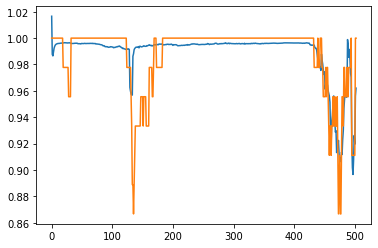

In [16]:
plt.plot(Xout[0,:,1])
plt.plot(Yin[0,:,1])